# Sorting


********
- Simple    

    1. Selection sort
        - 모든 index 에 대해 그 index 에 위치시킬 값을 ***선택*** 하여 위치를 바꿈
    2. Insertion sort
        - 인접한 두 수 끼리 비교하여 위치를 바꿈 (점차 정렬 범위를 넓게 -> 새로운 수와 비교 -> ***삽입*** )
    3. Bubble sort
        - 서로 인접한 두 수 끼리 비교하여 위치를 바꿈 (큰 값을 계속해서 뒤로 보내는 모습이 마치 ***방울이 이동하는 것***과 같아 거품정렬)

********
- Divide & Conquer

    4. Merge sort
        - 하나의 리스트를 2 개의 같은 크기의 리스트로 분할하고, 분할된 리스트 정렬 후, 정렬된 리스트를 합친다
    5. Quick sort
        - 리스트 안에 있는 한 요소를 선택해 pivot 설정, pivot 을 기준으로 왼쪽에는 pivot 보다 작은 수, 오른쪽에는 pivot 보다 큰 수
        - (Mergesort 처럼 divide & conquer 지만, 균등하게 나누는 게 아닌 pivot 을 기준으로 나눈다는 점이 다름)
        - ***step1.*** partition --> pivot 의 위치 반환
        - ***step2.*** pivot 기준 왼쪽과 오른쪽의 리스트를 다시 sorting
     
    6. Heap sort
        - 내림차순을 기준으로 정렬
        - Heap : 완전 이진 트리의 일종으로 우선순위 큐를 위해 만들어진 자료구조
        - 최대, 최소값을 쉽게 추출 가능

********
- Others   
    7.  Radix sort
        - 자리수를 비교해서 정렬하는 방식
        - 복잡도 = O(dn) (이때, d 는 가장 큰 데이터의 자리수)

********
overall :https://ict-nroo.tistory.com/52

detail : https://gmlwjd9405.github.io/2018/05/06/algorithm-insertion-sort.html


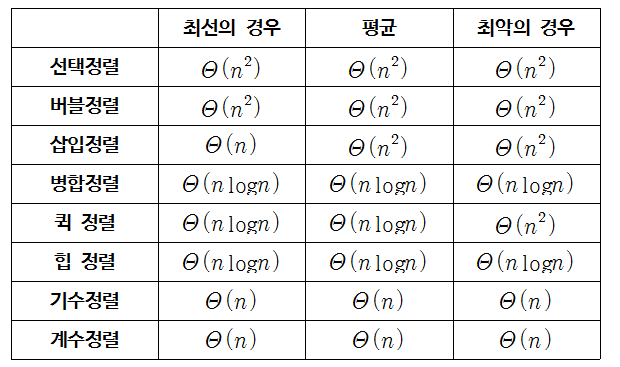

In [53]:
from IPython.display import Image

Image("../../img/sorting_summary.png") # code안에서 나오게 할 때

## O(N^2)

### Selection Sort 선택 정렬

일상에서 무언가를 크기 순으로 나열할 때 흔히 사용되는 사고 방식

ex. 170, 180, 150, 160
1. 가장 작은 키 맨 왼쪽으로 
    - ***150***, 170, 180, 160
2. 150 빼고 나머지 중 제일 작은 키 맨 왼쪽으로
    - 150, ***160***, 170, 180
    
    
- 크기 n 의 배열이 주어졌을 때, index 0 부터 n-1 까지의 모든 index i 에 대해, i 번째부터 n-1 번째 값 중 가장 작은 값을 구해 index i 의 값과 위치를 바꾸기

- 모든 index 에 대해 그 index 에 위치시킬 값을 **"선택"** 하기 때문에 "선택 정렬" 이라고 함

***
- 공간 복잡도 : O(1) 
    - 별도의 추가 공간을 사용하지 않고 주어진 배열이 차지하고 있는 공간 내에서 값들의 위치만 바꾸기 때문에 
- 시간 복잡도 : O(n^2)
    - 1) for 문을 통해 모든 index 에 접근해야 하기 때문에 O(N) 의 시간 소모
    - 2) 한번 for 문을 돌 때, 현재 index 와 다른 index의 값들을 비교하여 최소값을 찾고, 최소값과 현재 index 의 값의 위치를 바꿔야 하기 때문에 * O(N)
 


cf. https://www.daleseo.com/sort-selection/

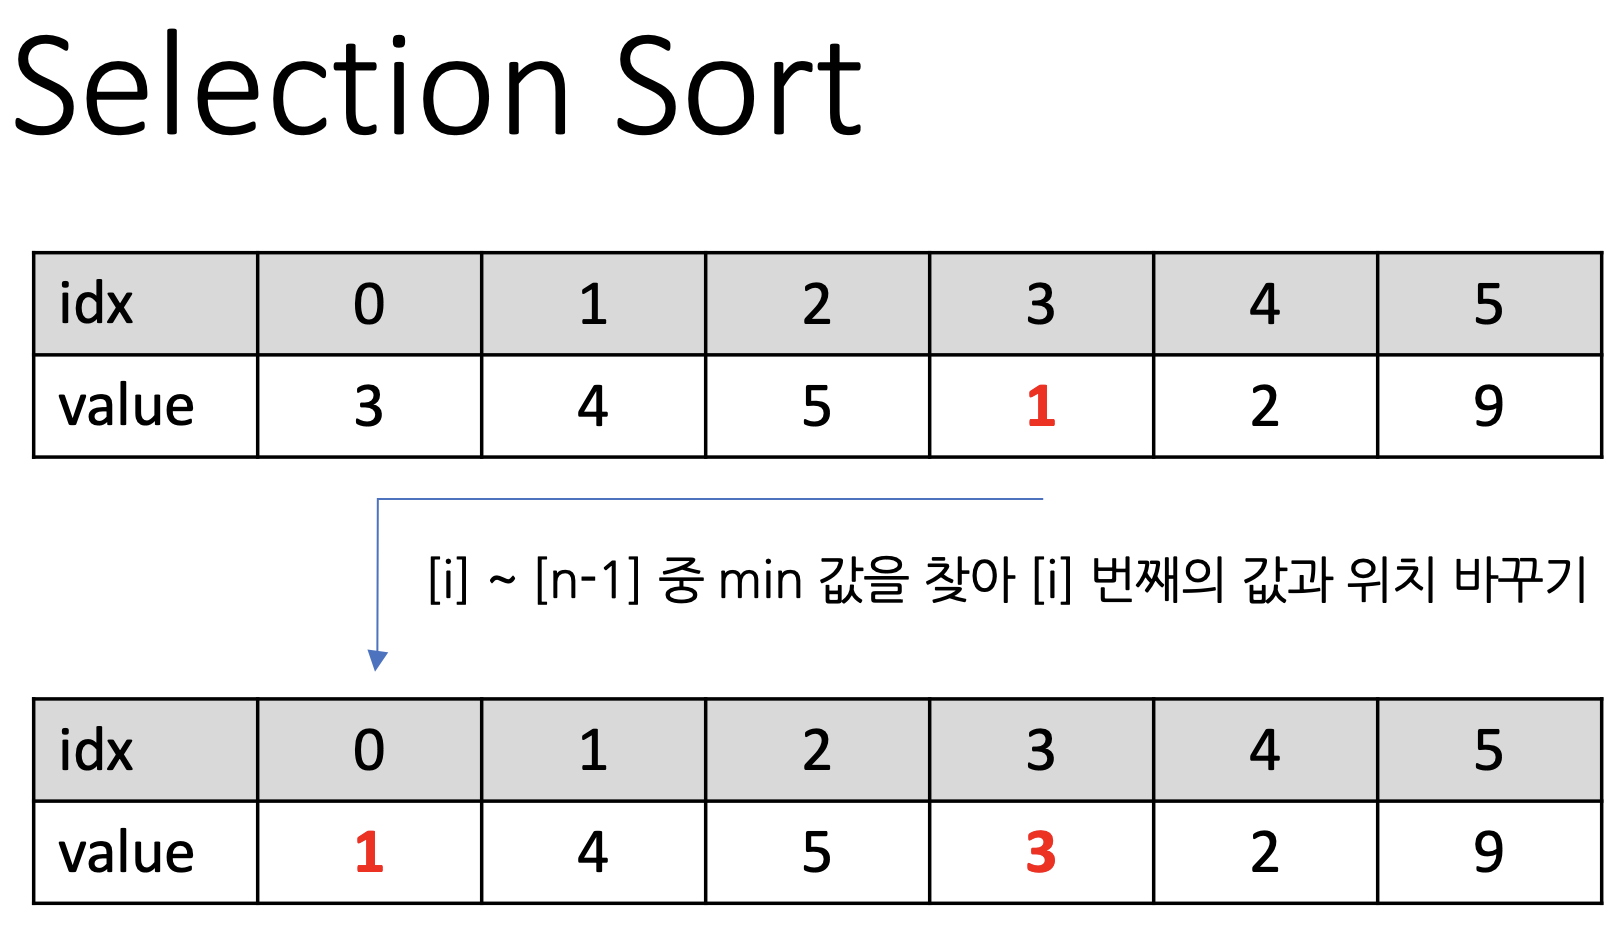

In [2]:
Image("../../img/selection_sort.png") # code안에서 나오게 할 때

In [18]:
def selection_sort(arr):
    for i in range(len(arr)-1):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
        print(i, arr)
    return arr

In [22]:
arr = [3, 4, 5, 1, 2, 9]
selection_sort(arr)

0 [1, 4, 5, 3, 2, 9]
1 [1, 2, 5, 3, 4, 9]
2 [1, 2, 3, 5, 4, 9]
3 [1, 2, 3, 4, 5, 9]
4 [1, 2, 3, 4, 5, 9]


[1, 2, 3, 4, 5, 9]

### Insersion Sort

정렬 범위를 1칸씩 확장해나가면서 새롭게 정렬 범위에 들어온 값을 기존 값들과 비교하여 알맞은 자리에 꼽아주는 알고리즘

***
- 공간 복잡도 : O(1)
    - 별도의 추가 공간을 사용하지 않고 주어진 배열이 차지하고 있는 공간 내에서 값들의 위치만 바꾸기 때문에
- 시간 복잡도 : O(N^2)
    - 1) for 문을 통해 정렬 범위를 2 부터 전체로 확장하기 때문에 O(N)
    - 2) for 문을 돌 때, 새롭게 추가된 값과 기존 값들의 대소 비교 및 자리 교대를 위해 * O(N)

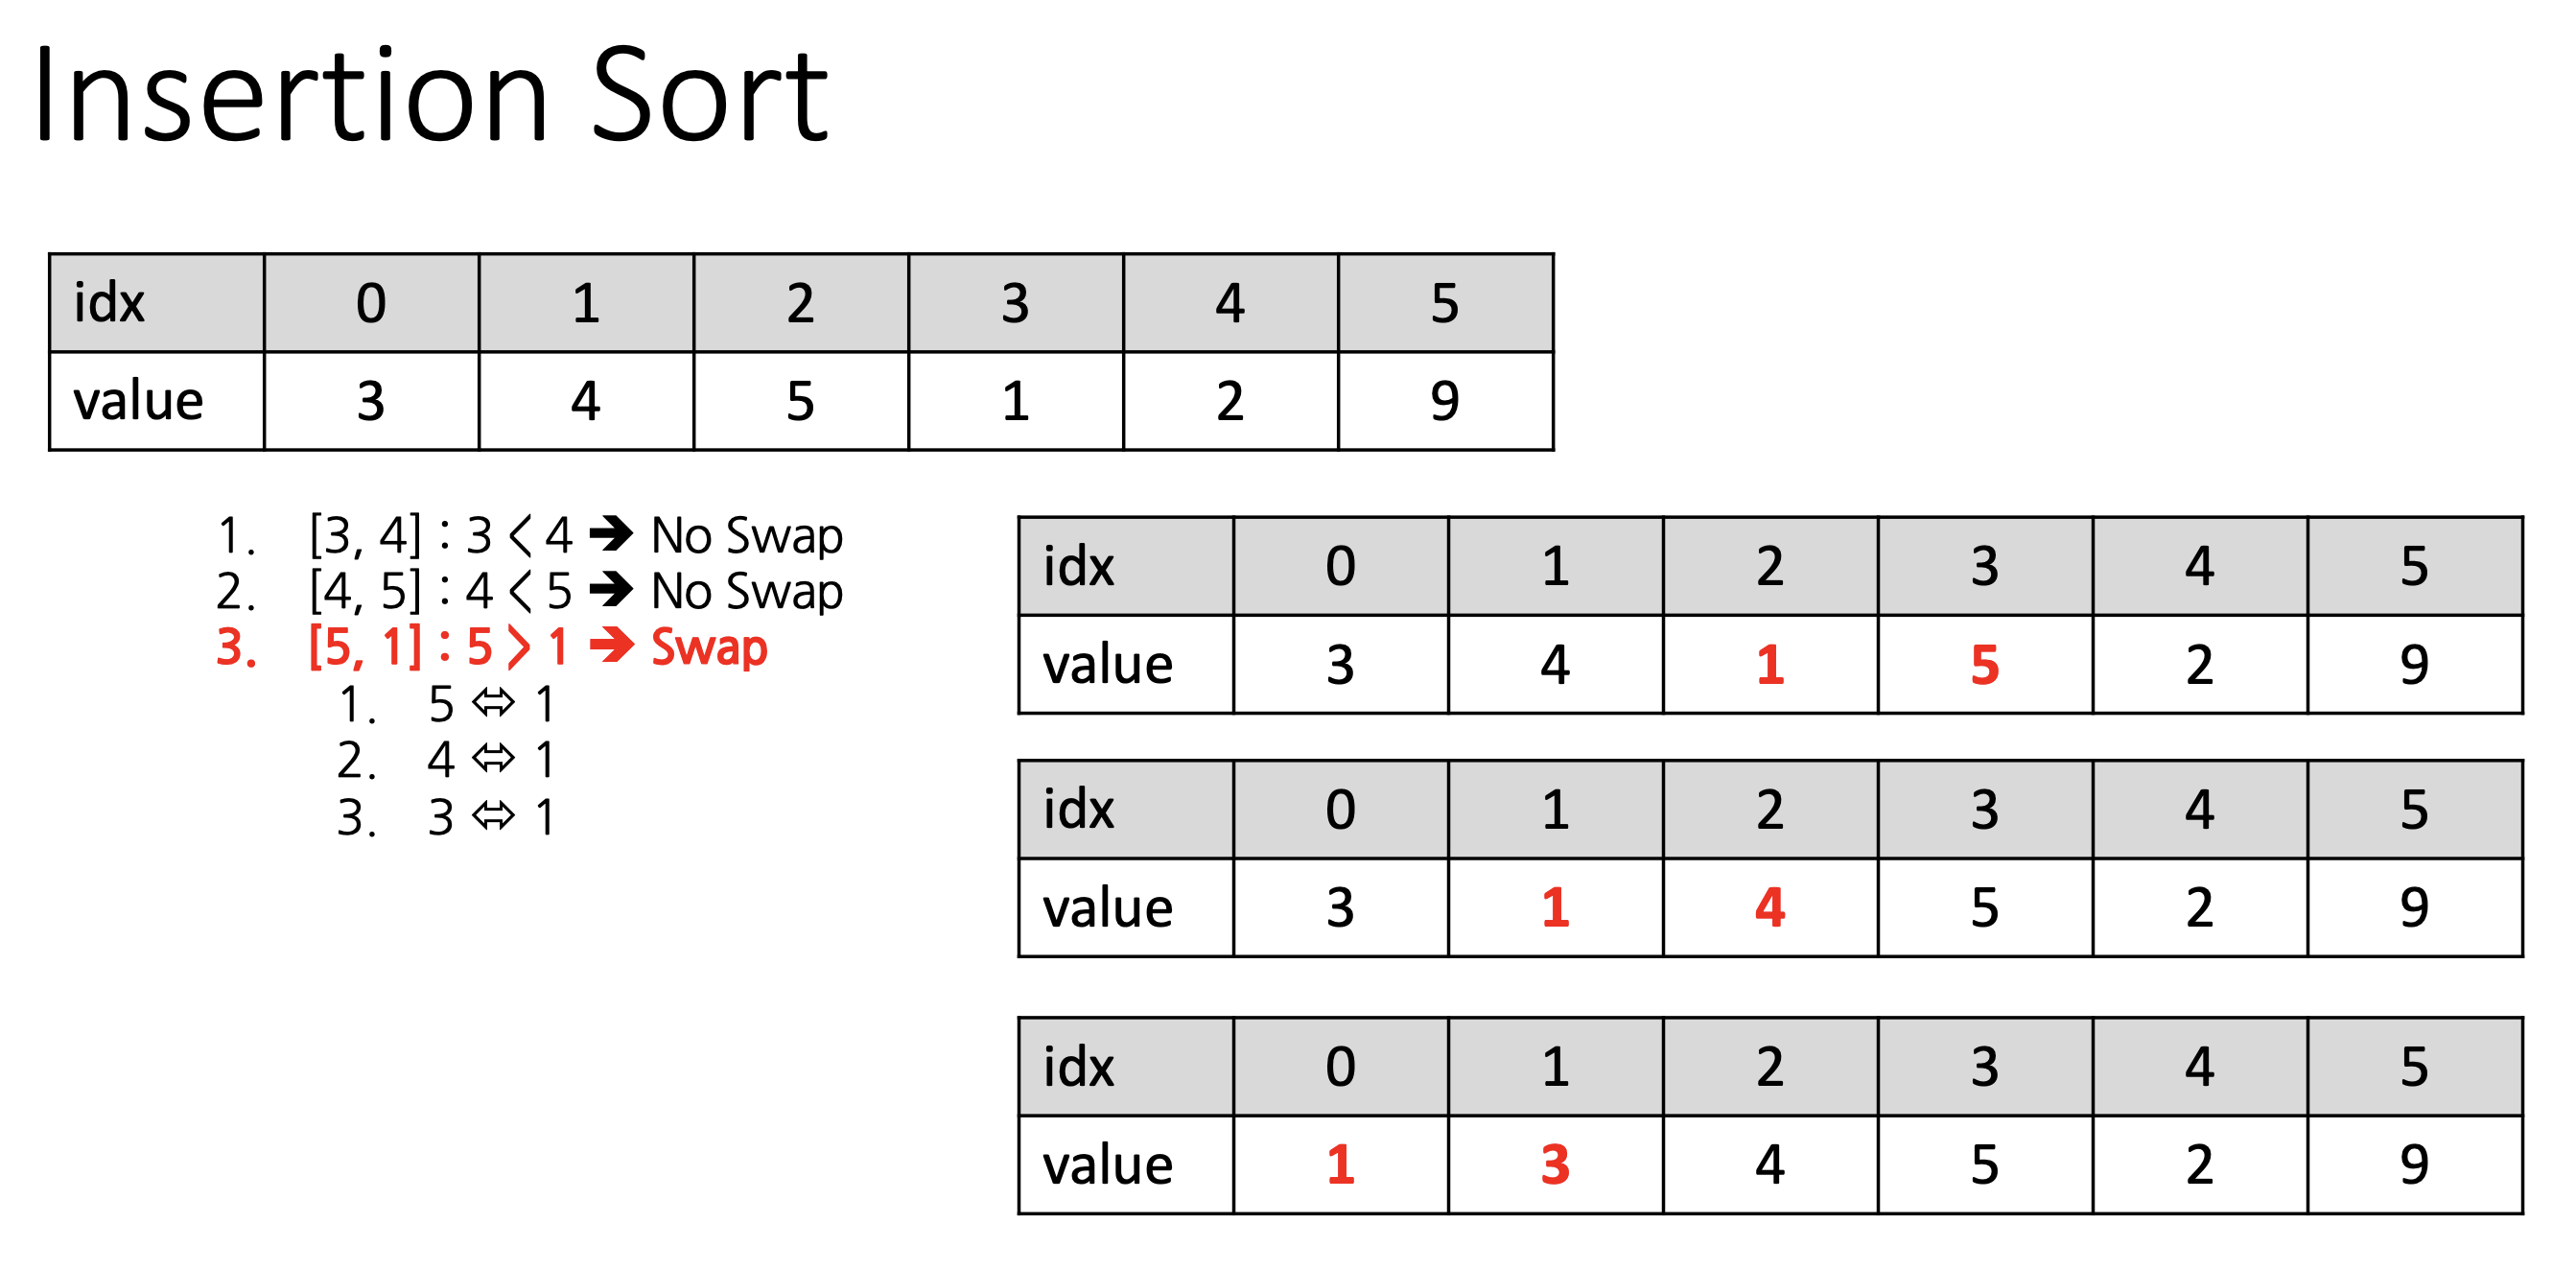

In [7]:
Image("../../img/insertion_sort.png") # code안에서 나오게 할 때

In [21]:
def insertion_sort(arr):
    for end in range(1, len(arr)): # 비교할 자리 (end) 를 늘려감
        count = 0
        for i in range(end, 0, -1):
            print("비교 index : ", i-1, i )
            if arr[i-1] > arr[i]:
                arr[i-1], arr[i] = arr[i], arr[i-1]
                count += 1
        print("{0} : {1} ({2} 번 swap)".format(end, arr, count))
        print()

In [22]:
arr = [1, 2, 3, 5, 4]
insertion_sort(arr)

비교 index :  0 1
1 : [1, 2, 3, 5, 4] (0 번 swap)

비교 index :  1 2
비교 index :  0 1
2 : [1, 2, 3, 5, 4] (0 번 swap)

비교 index :  2 3
비교 index :  1 2
비교 index :  0 1
3 : [1, 2, 3, 5, 4] (0 번 swap)

비교 index :  3 4
비교 index :  2 3
비교 index :  1 2
비교 index :  0 1
4 : [1, 2, 3, 4, 5] (1 번 swap)



***Insertion Sort 최적화***

- 기존에 있던 값들이 이전 for loop 에서 모두 정렬되었다는 점을 활용해 불필요한 비교 작업 제거

- swap 없이 값들을 shift 하는 것만으로도 삽입정렬 가능 (앞의 값이 정렬 범위에 추가시킨 값보다 클 경우, 앞의 값을 밀다가 최초로 작은 값을 만나는 순간 그 뒤에 추가된 값 뽑기)

ex)
- [1, 2, 3, 5] + [4] 
- 4가 추가되었을 때, 5는 4보다 크기 때문에 swap
- 3은 4보다 작기 때문에 No Swap! ==> 이 때 3 보다 앞에 있는 값들은 이미 정렬된 상태(3보다 작은 값) 이기에 4와 비교할 필요 X
- ***새롭게 추가된 값보다 작은 숫자를 만날 때까지만 내부 반복문 돌기***

In [39]:
def insertion_sort_upgrade1(arr):
    for end in range(1, len(arr)):
        count = 0
        i = end
        print("while 문 조건 : ", arr[i-1],">",  arr[i], "?")
        while i > 0 and arr[i-1] > arr[i]: 
            # 기존에 있던 값들이 이전 for loop 에서 모두 정렬되었다는 조건
            print("비교 index : ", i-1, i )
            print("비교 ")
            arr[i-1], arr[i] = arr[i], arr[i-1]
            i -= 1
            count +=1
        
        print("{0} : {1} ({2} 번 swap)".format(end, arr, count))
        print()
        
def insertion_sort_upgrade2(arr):
    for end in range(1, len(arr)):
        count = 0
        to_insert = arr[end]
        i = end
        print("while 문 조건 : ", arr[i-1],">",  arr[end], "?")
        while i > 0 and arr[i-1] > to_insert:        
            arr[i] = arr[i-1]
            i -= 1
            count +=1
        arr[i] = to_insert
        print("{0} : {1} ({2} 번 swap)".format(end, arr, count))
        print()

In [40]:
arr = [1, 2, 3, 5, 4]
insertion_sort_upgrade1(arr)

print("************")

arr = [1, 2, 3, 5, 4]
insertion_sort_upgrade2(arr)

while 문 조건 :  1 > 2 ?
1 : [1, 2, 3, 5, 4] (0 번 swap)

while 문 조건 :  2 > 3 ?
2 : [1, 2, 3, 5, 4] (0 번 swap)

while 문 조건 :  3 > 5 ?
3 : [1, 2, 3, 5, 4] (0 번 swap)

while 문 조건 :  5 > 4 ?
비교 index :  3 4
비교 
4 : [1, 2, 3, 4, 5] (1 번 swap)

************
while 문 조건 :  1 > 2 ?
1 : [1, 2, 3, 5, 4] (0 번 swap)

while 문 조건 :  2 > 3 ?
2 : [1, 2, 3, 5, 4] (0 번 swap)

while 문 조건 :  3 > 5 ?
3 : [1, 2, 3, 5, 4] (0 번 swap)

while 문 조건 :  5 > 4 ?
4 : [1, 2, 3, 4, 5] (1 번 swap)



### BubbleSort

- 뒤에서 부터 앞으로 정렬을 해나가는 구조 (즉, 제일 큰 값을 맨 뒤로 보내고, 그 다음 큰 값을 뒤에서 두번째에 배치)
- 이를 위해 배열 내의 값들을 앞뒤로 서로 비교 & 자리를 바꾸는 작업을 지속적으로 수행해야 함

- 큰 값을 계속해서 뒤로 보내는 모습이 ***마치 방울이 이동하는 것***과 같아 거품정렬이라는 이름이 붙음

***
- 큰 값들을 뒤에서부터 앞으로 하나씩 쌓는 알고리즘이기 때문에 후반으로 갈수록 정렬 범위가 하나씩 줄어듦
- 제일 작은 값을 찾아 맨 앞에 위치시키는 선택 정렬과 비교했을 때 정반대의 정렬 방향을 가짐
***

- 공간 복잡도 : O(1)
- 시간 복잡도 : O(N^2)


In [37]:
def bubble_sort(arr):
    for i in range(len(arr)-1, 0, -1):
        count = 0
        for j in range(i):
            print("비교 index : ", j, j+1)
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                count +=1
                
        print("{0} : {1} ({2} 번 swap)".format(i, arr, count))
        print()

In [41]:
arr = [1, 2, 3, 5, 4]
bubble_sort(arr)

비교 index :  0 1
비교 index :  1 2
비교 index :  2 3
비교 index :  3 4
4 : [1, 2, 3, 4, 5] (1 번 swap)

비교 index :  0 1
비교 index :  1 2
비교 index :  2 3
3 : [1, 2, 3, 4, 5] (0 번 swap)

비교 index :  0 1
비교 index :  1 2
2 : [1, 2, 3, 4, 5] (0 번 swap)

비교 index :  0 1
1 : [1, 2, 3, 4, 5] (0 번 swap)



***Bubble Sort 최적화***

- 이전 for loop 에서 swap 이 한번도 일어나지 않았다면, 정렬되지 않은 값이 없다! 따라서 이후의 비교 필요 없음!
- swap 여부 체크 대신, 마지막으로 swap 이 있었던 Index 를 기억해 다음 for loop 에서 해당 index 전까지만 정렬 (즉, 한칸씩 정렬 범위를 줄이는 대신, 여러 칸씩 정렬 범위를 줄여 나갈 수 있음)


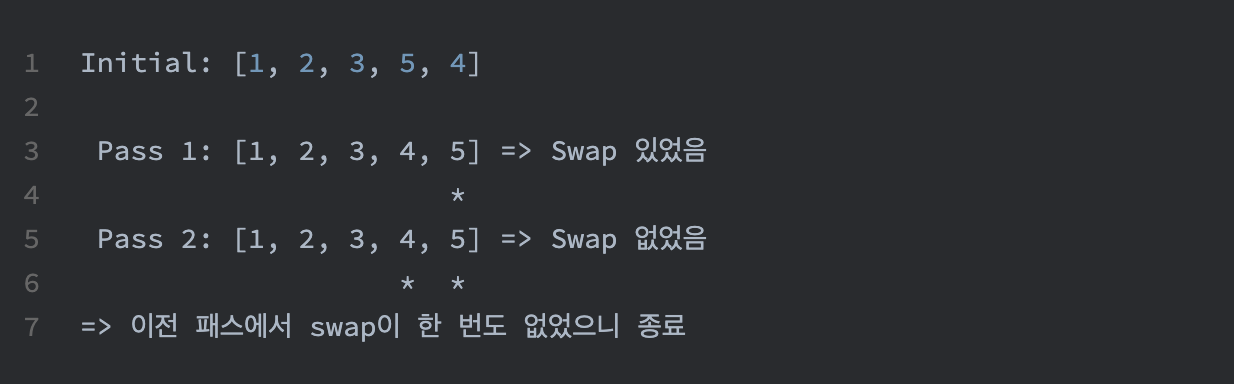

In [50]:
Image("../../img/bubble_sort_upgrade1.png") # code안에서 나오게 할 때

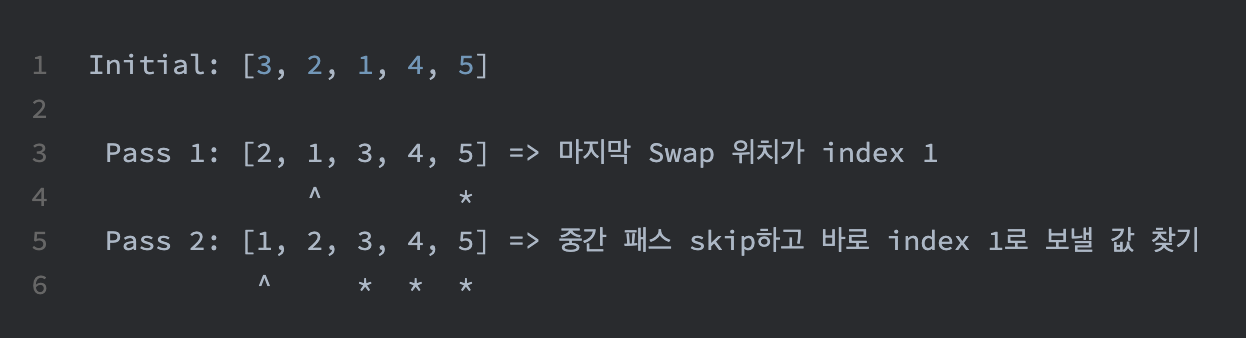

In [51]:
Image("../../img/bubble_sort_upgrade2.png") # code안에서 나오게 할 때

In [52]:
def bubble_sort_upgrade1(arr):
    for i in range(len(arr)-1, 0, -1):
        swapped = False
        count = 0
        for j in range(i):
            print("비교 Index :", j, j+1)
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
                count +=1
        print("{0} : {1} ({2} 번 swap)".format(i, arr, count))
        print()
        if not swapped:
            break
            
def bubble_sort_upgrade2(arr):
    end = len(arr)-1
    while end > 0:
        last_swap = 0
        for i in range(end):
            if arr[i] > arr[i+1]:
                arr[i], arr[i+1] = arr[i+1], arr[i]
                last_swap = i
        end = last_swap

In [49]:
arr = [3, 2, 1, 4, 5]
bubble_sort_upgrade1(arr)

비교 Index : 0 1
비교 Index : 1 2
비교 Index : 2 3
비교 Index : 3 4
4 : [2, 1, 3, 4, 5] (2 번 swap)

비교 Index : 0 1
비교 Index : 1 2
비교 Index : 2 3
3 : [1, 2, 3, 4, 5] (1 번 swap)

비교 Index : 0 1
비교 Index : 1 2
2 : [1, 2, 3, 4, 5] (0 번 swap)



## O(nlogn)